<a href="https://colab.research.google.com/github/Giuppone/CelMech/blob/main/Ciclos_dbours_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculo de ciclos para "QS Vir", requiere el archivo Datos.txt

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
#import pandas
plt.style.use('default')

In [ ]:
import os
# Let's determine the current directory and store it in a variable
# (execute this cell only once at the beginning)
# ayudas comandos: https://neptune.ai/blog/google-colab-dealing-with-files-2

from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
drive.mount('/content/drive', force_remount=False)
cwd = os.getcwd()
cwd

Mounted at /content/drive


'/content'

In [ ]:
#drive dir
drive_dir = "/content/drive/MyDrive/QSvir2021"
os.chdir (drive_dir)
!ls

2pl.ipynb  Ciclos-dbours-P.ipynb  Fig10-OCwithT.png   qsvir.dat
ae1.png    Datos.txt		  Fig4-Bours2016.png  QSvir-k-fit-1pl.ipynb
ae2.png    Fig10-Bours2016.png	  OC.ipynb


In [ ]:
# Leo el archivo con los datos 
Datos = np.loadtxt("Datos.txt")
#Datos = np.loadtxt("Datosr.txt")
# QS =pandas.read_csv('qsvir.dat', delim_whitespace=True)
EB = Datos[:,0] # Eclipses Bours
T =  Datos[:,1] # Tiempos de eclipse c/r al baricentro
ERR = Datos[:,2] # Error en los tiempos de eclipse
Obs = Datos[:,3] # Observador (leer Leyenda de Bours.txt para su comprensión)
# Por ej: obs[0]=1. => El "1" está asociado a "O’Donoghue et al. 2003"

In [ ]:
#Datos[:,0]

In [ ]:
Porb =1.50757506e-01
Porb1=T[1]-T[0]
print (Porb,Porb1,', diferencia en segundos=', abs(Porb-Porb1)*24*60*60)
Porb2=1.5075750e-01
# print (Porb,Porb2,', diferencia en segundos=', abs(Porb-Porb2)*24*60)
# print(T[1]-T[0],T[1],T[0],2,Porb2-Porb)

0.150757506 0.15077999999630265 , diferencia en segundos= 1.9434812805477542


In [ ]:
Porb = (T[1]-T[0])
Porb = Porb2
#print (Porb)
E1 = 171+np.round( (T-T[0])/Porb )  #ojo página 17 paper  Sterken+2005 
#E1 = 171+np.round( (T-T[0])/Porb )  #ojo página 17 paper  Sterken+2005 
E=np.zeros(len(E1)) #esto lo borro
# plt.xlim()
ij = 0
while ij<len(E1):
    E[ij]=ij
#     print (ij, E[ij], E1[ij], EB[ij])
    ij=ij+1

Text(0, 0.5, '# dato')

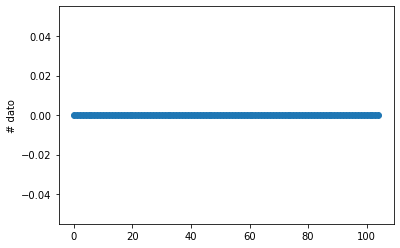

In [ ]:
plt.scatter(E,EB-E1) #anda todo bien!!
plt.ylabel('E_{Bours}-E_{nuestro}')
plt.ylabel('# dato')
#plt.xlim(0,20)

In [ ]:
#OJO el E lo vuelvo a lo q era antes
E=E1

In [ ]:
#resultAG NO ANDA !!! 
# AJUSTE LINEAL!!
#TE = t0 + Porb*E
# x=E[0:20]
# y=T[0:20]
x=E
y=T
p= np.polyfit(x, y, 1, rcond=None, full=False, w=None, cov=False)
p

p2=np.polyfit(x, y, 2, rcond=None, full=False, w=None, cov=False)
p2

# p3=np.polyfit(x, y, 3, rcond=None, full=False, w=None, cov=False)
# p3

print (p[0],p[1])
print (p2[0],p2[1],p2[2])
# print (p3)

0.15075747464852973 48689.14152030193
7.370148339791296e-13 0.15075743599197833 48689.14177586773


In [ ]:
pdot=p2[0]/(0.5*p2[1]) #[d/s]
print (pdot)

9.777492289247284e-12


Text(20000.0, 50000.0, 'las curvas lineal y cuadrática son indistinguibles')

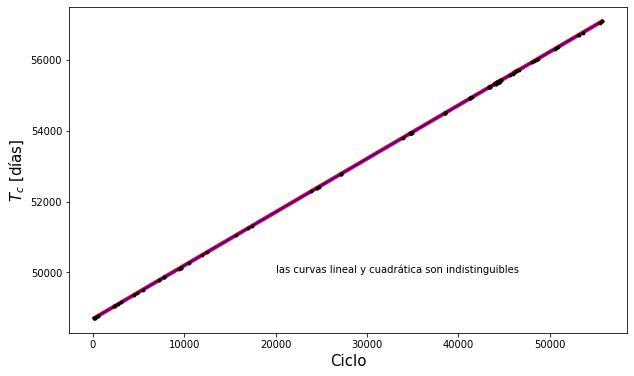

In [ ]:
# Grafico Tiempos de eclipse vs ciclos
plt.figure(figsize=(10,6))

Tc  =  p[1]+p[0]*E 
Tc2 = p2[2]+p2[1]*E+(p2[0])*E**2

plt.plot(E, Tc, color='red', label='Efeméride lineal', lw=4, zorder=-3)
plt.plot(E, Tc2, color='blue', label='Efeméride Cuadrática', zorder=-2)
plt.scatter(E, T, color='black', label='Datos', s=8)

# plt.title('Ajuste', fontsize=20)
plt.xlabel('Ciclo', fontsize=15)
plt.ylabel('$T_c$ [días]', fontsize=15);
# plt.xlim(50000,52000)
plt.text(2e4,5e4,'las curvas lineal y cuadrática son indistinguibles')

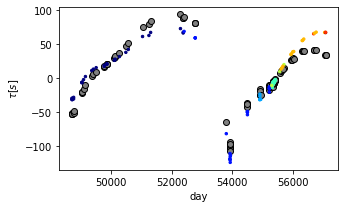

In [ ]:
# Obtengo O-C 
plt.figure(figsize=(5,3))
secD = 24*60*60                # segundos en un día
plt.scatter(T, (T-(p[1]+p[0]*E))*secD, s=6, c=Obs, cmap='jet')
plt.scatter(T, (T-(p2[2]+p2[1]*E+(p2[0])*E**2))*secD, c='gray', zorder=-2,edgecolor='black')
# plt.scatter(T, (T-(p3[3]+p3[2]*E+(p3[1])*E**2+(p3[0])*E**3))*secD, c='pink', zorder=-2,edgecolor='black')

### Por que hacer hasta el cuadrático? 
#plt.title('O-C', fontsize=20)
plt.xlabel('day')
plt.ylabel(r'$\tau [s]$');
plt.savefig('Fig10-Bours2016.png')

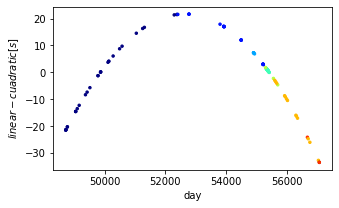

In [ ]:
# Obtengo O-C 
plt.figure(figsize=(5,3))
secD = 24*60*60                # segundos en un día
dif = (p[1]+p[0]*E)*secD-(p2[2]+p2[1]*E+(p2[0])*E**2)*secD
plt.scatter(T, dif, s=6, c=Obs, cmap='jet')
# plt.scatter(T, (T-(p2[2]+p2[1]*E+(p2[0])*E**2))*secD, c='gray', zorder=-2,edgecolor='black')
# plt.scatter(T, (T-(p3[3]+p3[2]*E+(p3[1])*E**2+(p3[0])*E**3))*secD, c='pink', zorder=-2,edgecolor='black')

### Por que hacer hasta el cuadrático? 
#plt.title('O-C', fontsize=20)
plt.xlabel('day')
plt.ylabel(r'$linear - cuadratic [s]$');
plt.savefig('compara.png')